In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage

## 前処理

In [4]:
#データ取得
df_origin = pd.read_csv("/workspace/data/train.csv").drop("Unnamed: 0", axis=1).dropna()


In [5]:
#欠損値の削除
df_origin = df_origin.dropna()
df_origin

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [6]:
#欠損値有無の確認
is_null = df_origin.isnull()
null_counts = is_null.sum()
null_counts

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [7]:
##Class毎に抽出する
business= df_origin.query('Class == "Business"')
eco = df_origin.query('Class == "Eco"')
eco_plus = df_origin.query('Class == "Eco Plus"')
#データ数削減
business_new = business.sample(n=11500, random_state=42)
eco_new = eco.sample(n=11500, random_state=42)
#データを結合
df = pd.concat([eco_new, business_new, eco_plus], axis=0)
#クラスの割合を確認
df["Class"].value_counts()

Class
Eco         11500
Business    11500
Eco Plus     7468
Name: count, dtype: int64

In [8]:
#Class毎に抽出する

df_Busi = df.query('Class == "Business"')
df_Eco = df.query('Class == "Eco"')
df_Plus = df.query('Class == "Eco Plus"')

In [9]:
#id,unnamed,class,satisfaction 不要な列を消す
#ecoクラスのsatisfaction　は残す

df_Busi_del = df_Busi.drop(['id','satisfaction','Class'], axis=1)
df_Eco_del = df_Eco.drop(['id','satisfaction','Class'], axis=1)
df_Plus_del = df_Plus.drop(['id','satisfaction','Class'], axis=1)

In [10]:
# One-hot encodingを実行する

df_Busi_enc = pd.get_dummies(df_Busi_del, dtype=int,drop_first=True)
df_Eco_enc = pd.get_dummies(df_Eco_del, dtype=int,drop_first=True)
df_Plus_enc = pd.get_dummies(df_Plus_del, dtype=int,drop_first=True)

In [11]:
'''
Gender_Male　　0=男性,1=女性
'''

df_Eco_enc

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
85208,69,546,2,5,2,4,3,4,5,4,...,2,4,4,4,2,0,0.0,0,0,1
31633,31,842,3,5,3,1,1,3,1,1,...,3,5,5,4,1,35,16.0,1,0,1
10425,62,1372,3,4,2,2,3,4,4,1,...,2,1,3,1,4,0,0.0,0,0,1
64557,41,1771,3,3,3,3,2,3,2,2,...,4,2,3,4,2,20,23.0,0,1,0
41909,18,937,2,5,2,2,1,2,1,1,...,2,2,1,1,1,0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25747,26,1055,2,4,3,1,3,3,3,3,...,3,5,3,5,3,0,0.0,1,0,1
85937,60,1400,2,5,2,3,2,4,4,4,...,3,4,4,3,4,188,160.0,1,0,1
64395,36,1546,2,5,1,5,2,2,2,2,...,5,2,4,3,2,0,0.0,1,0,0
98313,25,240,3,4,3,3,3,3,3,3,...,4,5,3,4,3,0,8.0,0,0,1


In [12]:
df_Eco_enc = df_Eco_enc.reset_index(drop=True)
Eco_enc_df = df_Eco_enc

In [13]:
df_Busi_enc.shape

(11500, 21)

In [14]:
df_Eco_enc.shape

(11500, 21)

In [15]:
df_Plus_enc.shape

(7468, 21)

In [16]:
df_Busi_enc.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel'],
      dtype='object')

In [17]:
df_Eco_enc.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel'],
      dtype='object')

In [18]:
df_Plus_enc.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel'],
      dtype='object')

In [19]:
Eco_enc_df.info()

'''
0   Age                                年齢
1   Flight Distance                    飛行距離
2   Inflight wifi service              機内wifiサービス
3   Departure/Arrival time convenient  出発・到着時間の利便性
4   Ease of Online booking             オンライン予約のしやすさ
5   Gate location                      ゲートの位置
6   Food and drink                     飲食
7   Online boarding                    オンライン搭乗
8   Seat comfort                       シートの快適性
9   Inflight entertainment             機内エンターテインメント
10  On-board service                    機内サービス
11  Leg room service                    レッグルームサービス
12  Baggage handling                    手荷物取扱い
13  Checkin service                     チェックイン・サービス
14  Inflight service                    機内サービス
15  Cleanliness                         清潔さ
16  Departure Delay in Minutes          出発の遅れ（分）
17  Arrival Delay in Minutes            到着遅延（分）
18  Gender_Male                         性別_男性
19  Customer Type_disloyal Customer     顧客タイプ_不誠実な顧客
20  Type of Travel_Personal Travel      旅行タイプ_個人旅行
21  satisfaction_satisfied              満足度_満足

'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11500 non-null  int64  
 1   Flight Distance                    11500 non-null  int64  
 2   Inflight wifi service              11500 non-null  int64  
 3   Departure/Arrival time convenient  11500 non-null  int64  
 4   Ease of Online booking             11500 non-null  int64  
 5   Gate location                      11500 non-null  int64  
 6   Food and drink                     11500 non-null  int64  
 7   Online boarding                    11500 non-null  int64  
 8   Seat comfort                       11500 non-null  int64  
 9   Inflight entertainment             11500 non-null  int64  
 10  On-board service                   11500 non-null  int64  
 11  Leg room service                   11500 non-null  int

'\n0   Age                                年齢\n1   Flight Distance                    飛行距離\n2   Inflight wifi service              機内wifiサービス\n3   Departure/Arrival time convenient  出発・到着時間の利便性\n4   Ease of Online booking             オンライン予約のしやすさ\n5   Gate location                      ゲートの位置\n6   Food and drink                     飲食\n7   Online boarding                    オンライン搭乗\n8   Seat comfort                       シートの快適性\n9   Inflight entertainment             機内エンターテインメント\n10  On-board service                    機内サービス\n11  Leg room service                    レッグルームサービス\n12  Baggage handling                    手荷物取扱い\n13  Checkin service                     チェックイン・サービス\n14  Inflight service                    機内サービス\n15  Cleanliness                         清潔さ\n16  Departure Delay in Minutes          出発の遅れ（分）\n17  Arrival Delay in Minutes            到着遅延（分）\n18  Gender_Male                         性別_男性\n19  Customer Type_disloyal Customer     顧客タイプ_不誠実な顧客\n20  Type of Travel_P

## Ecoクラス分析

#### 年齢別

In [20]:
#年齢別
Eco_enc_df['decade'] =Eco_enc_df['Age'].astype('str').apply(lambda x:x[0][0]).apply(lambda x: x+ '0s')

In [21]:
Eco_enc_df.sort_values('Flight Distance', inplace=True)

### 次元削減とクラスタリング

#### クラスタリングのための前処理

In [22]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler

In [23]:
df_Eco_enc.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'decade'],
      dtype='object')

In [24]:
# 数値列のみを選択
numeric_columns = ['Gender_Male','Customer Type_disloyal Customer','Age',
                   'Type of Travel_Personal Travel','Flight Distance','Departure/Arrival time convenient','Arrival Delay in Minutes']
df_Eco_enc[numeric_columns]

'# NumPy配列からPandas DataFrameへ変換\nEco_enc_df_std_ded = pd.DataFrame(Eco_enc_df_std_ded, columns=numeric_columns)\n\n\n# サンプルサイズを指定\nsample_size = 30000\n\n# ランダムにデータをサンプリング\nrandom_sample = Eco_enc_df_std_ded.sample(n=sample_size, random_state=42)\nnumeric_data = random_sample[numeric_columns].values'

In [25]:
df_Eco_enc[numeric_columns].head(2)

,Gender_Male,Customer Type_disloyal Customer,Age,Type of Travel_Personal Travel,Flight Distance,Departure/Arrival time convenient,Arrival Delay in Minutes
8139,1,0,41,0,56,2,0.0
7465,0,0,65,1,67,1,12.0


In [26]:
## StandardScalerを適用
scaler = StandardScaler()
df_Eco_enc_std = scaler.fit_transform(df_Eco_enc[numeric_columns])

## デンドログラム

### デンドログラム

In [28]:
df_Eco_enc_std

array([[ 1.02536507, -0.54948696,  0.21928739, ..., -1.24661606,
        -0.80341048, -0.40453672],
       [-0.9752624 , -0.54948696,  1.65359126, ..., -1.22681341,
        -1.45946534, -0.09616334],
       [ 1.02536507,  1.81987939, -0.85644051, ..., -1.22681341,
        -2.1155202 ,  1.44570361],
       ...,
       [ 1.02536507, -0.54948696, -0.43810188, ...,  7.58716572,
        -1.45946534, -0.40453672],
       [-0.9752624 , -0.54948696, -0.49786454, ...,  7.62317054,
         0.50869923, -0.40453672],
       [-0.9752624 , -0.54948696,  0.57786336, ...,  7.62317054,
        -0.14735563, -0.40453672]])

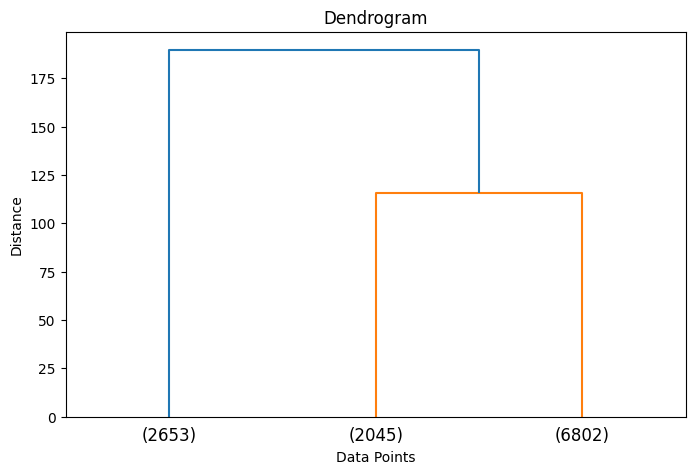

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 階層クラスタリング
linkage_matrix = linkage(df_Eco_enc_std, method='ward')

# デンドログラム作成
plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix, truncate_mode='lastp', p=3)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')

# 保存するファイルパスを指定して保存
plt.savefig('dendrogram.png')
plt.show()

/usr/local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 0, 1, ..., 0, 0, 0])

In [59]:
from scipy.cluster.hierarchy import fcluster
df_Eco_enc_std_clus_den = fcluster(linkage_matrix ,t=3, criterion='maxclust')


# クラスタリング結果を元のデータフレームに追加
df_Eco_enc['Cluster_den'] = df_Eco_enc_std_clus_den

In [60]:
df_Eco_enc['satisfaction'] = df_Eco.reset_index(drop=True)['satisfaction']

In [61]:
df_Eco_enc.tail(2)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,decade,Cluster_den,satisfaction
5802,29,4983,2,4,2,5,2,4,4,2,...,3,4,6,0.0,0,0,1,20s,3,neutral or dissatisfied
3199,47,4983,1,3,1,4,1,3,3,3,...,2,3,0,0.0,0,0,1,40s,3,neutral or dissatisfied


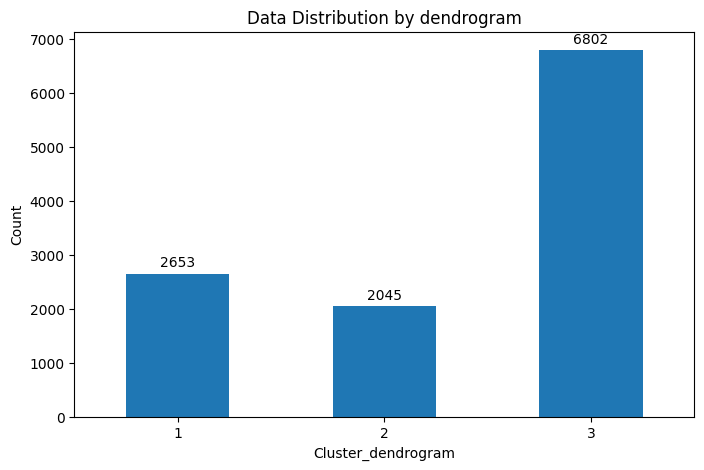

In [62]:
# クラスターごとのカウントを計算
cluster_counts = df_Eco_enc['Cluster_den'].value_counts().sort_index()

# グラフの作成
fig, ax = plt.subplots(figsize=(8, 5))
cluster_counts.plot(kind='bar', ax=ax)

# グラフのラベルとタイトルを設定
ax.set_xlabel('Cluster_dendrogram')
ax.set_ylabel('Count')
ax.set_title('Data Distribution by dendrogram')

# 各バーの上に数値を表示
for bar in ax.containers[0]:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', (bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# x軸の数値を90度回転させる
ax.tick_params(axis='x', rotation=0)

plt.show()

'/workspace/code/Clustering/Dendrogram'

In [44]:
# 数値列のみを選択
numeric_columns = ['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking',
                   'Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment',
                   'On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']
df_Eco_enc[numeric_columns]

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
8139,5,2,2,2,5,5,5,5,3,1,4,2,3,5
7465,3,1,0,1,1,2,2,5,5,0,5,1,5,4
3396,0,0,0,2,2,0,2,2,3,2,5,3,4,2
5663,3,5,3,3,5,3,5,5,4,3,5,4,5,5
4353,2,2,2,3,4,2,4,4,1,4,4,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5547,0,5,0,1,0,1,1,3,4,5,5,1,3,1
3128,3,4,3,5,3,3,3,3,1,5,1,3,3,3
2324,1,1,1,1,1,1,1,2,2,4,3,1,3,1
5802,2,4,2,5,2,4,4,2,2,4,4,4,3,4
